In [1]:
import numpy as np
import matplotlib
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
x_train1= pd.read_csv("Train_Dataset1.csv")  
x_test1=pd.read_csv("Test_Dataset1.csv")
x_train2=pd.read_csv("Train_Dataset2.csv")
x_test2=pd.read_csv("Test_Dataset2.csv")
x_train1=x_train1[1:]
x_test1=x_test1[1:]
x_train2=x_train2[1:]
x_test2=x_test2[1:]

x_train1=np.array(x_train1)
x_test1=np.array(x_test1)

x_train2=np.array(x_train2)
x_test2=np.array(x_test2)

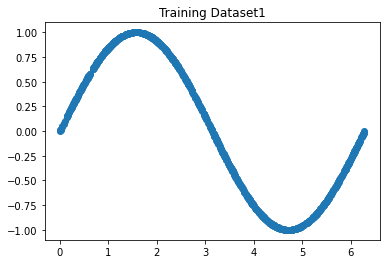

In [3]:
fig, (ax1) = plt.subplots()
ax1.set_title('Training Dataset1')
scatter = ax1.scatter(x_train1[:, 0],  x_train1[:, 1])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


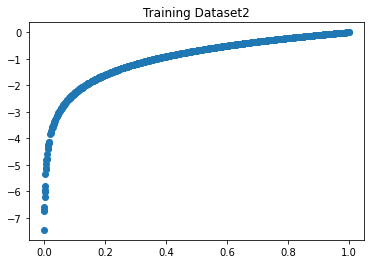

In [4]:
fig, (ax2) = plt.subplots()
ax2.set_title('Training Dataset2')
scatter = ax2.scatter(x_train2[:, 0],  x_train2[:, 1])
fig.show()


In [5]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
class ANN:
    def __init__(self):
        
        weights=np.random.rand(4)
        bias=np.random.rand(4)
        self.w1_n1=weights[0]
        self.w2_n2=weights[1]
        self.w3_op=weights[2]
        self.w4_op=weights[2]

        # Biases
        self.b_n1=bias[0]
        self.b_n2=bias[1]
        self.b_y_hat=bias[2]
        
        self.Learning_Rate=.05
        self.mse=9999
       
    def feedforward(self,f1,f2):
        #hidden layer
        self.n1    = self.sigmoid(f1*self.w1_n1+ self.b_n1)
        self.n2    = self.sigmoid(f1*self.w2_n2+self.b_n2)
        #final output
        self.y_hat =self.n1*self.w3_op + self.n2*self.w4_op  + self.b_y_hat
      
       
        
    def backpropagation(self, f1,f2, y):
        
        
        y_hat_der = (-2 * (y-self.y_hat) * self.sigmoid_der(self.n1*self.w3_op + self.n2*self.w4_op + self.b_y_hat))
        
        n1_der =  self.sigmoid_der(f1*self.w1_n1 + self.b_n1)
        n2_der =  self.sigmoid_der(f1*self.w2_n2+ self.b_n2)
        # Update Biases
        self.b_n1    -= self.lr * y_hat_der * n1_der
        self.b_n2    -= self.lr * y_hat_der * n2_der
        self.b_y_hat -= self.lr * y_hat_der

        # Update Weights
        
        self.w1_n1 -= self.lr * y_hat_der * n1_der * f1
        self.w2_n2 -= self.lr * y_hat_der * n2_der * f1
        
        self.w3_op -= self.lr * y_hat_der * self.n1
        self.w4_op -= self.lr * y_hat_der * self.n2
        
        
        
    def sigmoid(self,inputs):
        return 1 / (1 + np.exp(-inputs))
        
    def  sigmoid_der(self,output):
        
        return self.sigmoid(output) * (1.0 - self.sigmoid(output))
    
    def tanh(self,inputs):
        return np.tanh(inputs)
        
    def  tanh_der(self,output):
        
        return (1.0 - self.sigmoid(output)**2)
    def Loss(self,output,y):
        return np.square(np.subtract(output,y)).mean()
    
    def TransformFeatures(self,input):
        self.f1=input
        self.f2=np.square(input)
        
      
    
    def FitModel(self,X, y,  itr=10000, lr=0.1):
        self.TransformFeatures(X)
        mse_list = []
        self.lr = lr
        mse=99999
        i=0
        print('ANN: Begin Training')
        while i<itr and mse>0.0001:
            mse = self.Loss(y, self.predict(X))
            mse_list.append(mse)
                 
            f1=self.f1
            f2=self.f2
            i+=1
            # Loop to go over each training example for current epoch
            for j in range(len(f1)):
                self.feedforward(f1[j],f2[j])
                self.backpropagation(f1[j],f2[j], y[j])  
        print('MSE: ',end=" ")
        print(mse)
           
        print('ANN: End Training')
        return mse_list
    
    
    
    
            
    def predict(self, X):
        self.TransformFeatures(X)
        result = []
        f1=self.f1
        f2=self.f2
        
        self.feedforward(f1,f2)
        
        #result.append(self.y_hat)
        
        return self.y_hat
            
                   
            


In [6]:
ann=ANN()
ann.FitModel(x_train1[:, 0],  x_train1[:, 1])
trainresult1=ann.predict(x_train1[:, 0])



ANN: Begin Training
MSE:  0.00037985229886428864
ANN: End Training


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


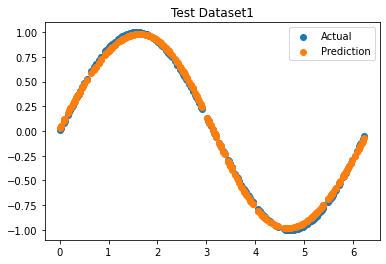

In [7]:

result1=ann.predict(x_test1[:, 0])


fig, ax1 = plt.subplots()
ax1.set_title('Test Dataset1')
scatter = ax1.scatter(x_test1[:, 0],  x_test1[:, 1],label='Actual')

scatter2 = ax1.scatter(x_test1[:, 0], result1,label='Prediction')

ax1.legend()

fig.show()


In [8]:

ann.FitModel(x_train2[:, 0],  x_train2[:, 1])
trainresult2=ann.predict(x_train2[:, 0])



ANN: Begin Training
MSE:  0.05111502125354465
ANN: End Training


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


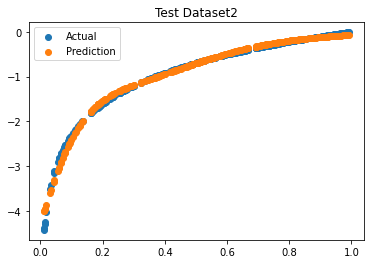

In [9]:

result2=ann.predict(x_test2[:, 0])


fig, ax1 = plt.subplots()
ax1.set_title('Test Dataset2')
scatter = ax1.scatter(x_test2[:, 0],  x_test2[:, 1],label='Actual')

scatter2 = ax1.scatter(x_test2[:, 0], result2,label='Prediction')


ax1.legend()
fig.show()


In [10]:
def MSELoss(ip,output):
    return np.square(np.subtract(ip,output)).mean()

In [11]:
print('Dataset 1')
trainLoss1=MSELoss(trainresult1,x_train1[:, 1])
testLoss1=MSELoss(result1,x_test1[:, 1])
print('Train loss ',end="")
print(trainLoss1)
print('Test loss ',end="")
print(testLoss1)

Dataset 1
Train loss 0.0003798269001553662
Test loss 0.00038354762337958475


In [12]:
result2=ann.predict(x_test2[:, 0])
testloss2=MSELoss(result2,x_test2[:, 1])
trainLoss2=MSELoss(trainresult2,x_train2[:, 1])
print('Dataset 2')
print('Train loss ',end="")
print(trainLoss2)
print('Test loss ',end="")
print(testloss2)

Dataset 2
Train loss 0.05111478138026337
Test loss 0.004729194989461161
